In [109]:
# Importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dc_stat_think as dcst

sns.set()
%matplotlib inline

In [104]:
#Loading Data to DataFrame and settings columns values
df= pd.read_csv('C:\Users\MICROSOFT\Music\DS-Cheat Sheet\DATA\gandhi_et_al_bouts.csv')
df.columns = ['genotype','bout_length','fish']

In [117]:
#creating three arrays for wild, mutant andheterozygote "sim-mutant" type fish 
bout_lengths_wt = df[(df.genotype == 'wt')].bout_length
bout_lengths_mut = df[(df.genotype == 'mut')].bout_length
bout_lengths_het = df[(df.genotype == 'het')].bout_length

In [118]:
def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1,dtype=float) / n
    
    return x, y

In [119]:
# Generate x and y values for plotting ECDFs for both types of fish
x_wt, y_wt = ecdf(bout_lengths_wt)
x_mut, y_mut = ecdf(bout_lengths_mut)


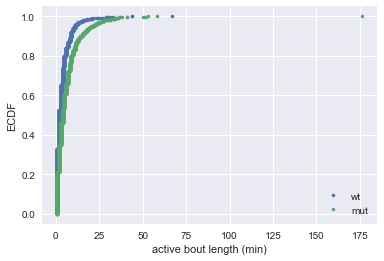

In [120]:
# Plot the ECDFs
dig= plt.plot(x_wt, y_wt, marker='.', linestyle='none')
dig = plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
dig = plt.legend(('wt', 'mut'))
dig = plt.xlabel('active bout length (min)')
dig = plt.ylabel('ECDF')
plt.show()

In [121]:
# Bootstrap confidence intervals: Optimal parameter value

# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("wt:  mean = ", mean_wt, "conf. int. =", conf_int_wt,
"mut: mean =" ,mean_mut, "conf. int. =" ,conf_int_mut,)

('wt:  mean = ', 3.8735557132719247, 'conf. int. =', array([3.63244322, 4.12956813]), 'mut: mean =', 6.54337278106505, 'conf. int. =', array([6.11448928, 7.02907544]))


In [124]:
# Test the hypothesis that the heterozygote and wild type bout lengths are identically distributed using a permutation test.

# Compute the difference of means: diff_means_exp
diff_means_exp =  np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps( bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size=10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp, dtype=float) / len(perm_reps)

# Print the result
print('p =', p_val)

"""
A p-value of 0.001 suggests that the observed difference in means is unlikely 
to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.
"""

('p =', 0.0009)


In [126]:
# Bootstrap hypothesis test

# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted,np.mean,size=10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted,np.mean,size=10000)

# Get replicates of difference of means: bs_replicates
bs_reps =  bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp, dtype=float) / len(bs_reps)
print('p-value =', p)

('p-value =', 0.0003)
